In [1]:
from shared import *
import utils.forge_purchases as forge_purchases
import utils.forge_item_types as forge_item_types
import utils.wearable_types as wearable_types
wearable_types_df = wearable_types.get_wearable_types_df()
forge_item_types_df = forge_item_types.get_forge_item_types_df(wearable_types_df)
forge_purchases_df = forge_purchases.get_forge_purchases_df()

forge_purchases_types_df = forge_purchases.get_forge_purchases_types_df(forge_purchases_df, forge_item_types_df)
get_median_price_by_column = lambda column, df=forge_purchases_types_df: pd.DataFrame(df[[column, 'price']].groupby(column).median()).rename(columns={'price': 'Median Price (GHST)'})

## Forge Item Baazaar Sales Prices
Based on sales of forge items (alloy, schematics, cores, essence, geodes) on the Aavegotchi Baazaar during the reporting window.

### Alloy Price Over Time

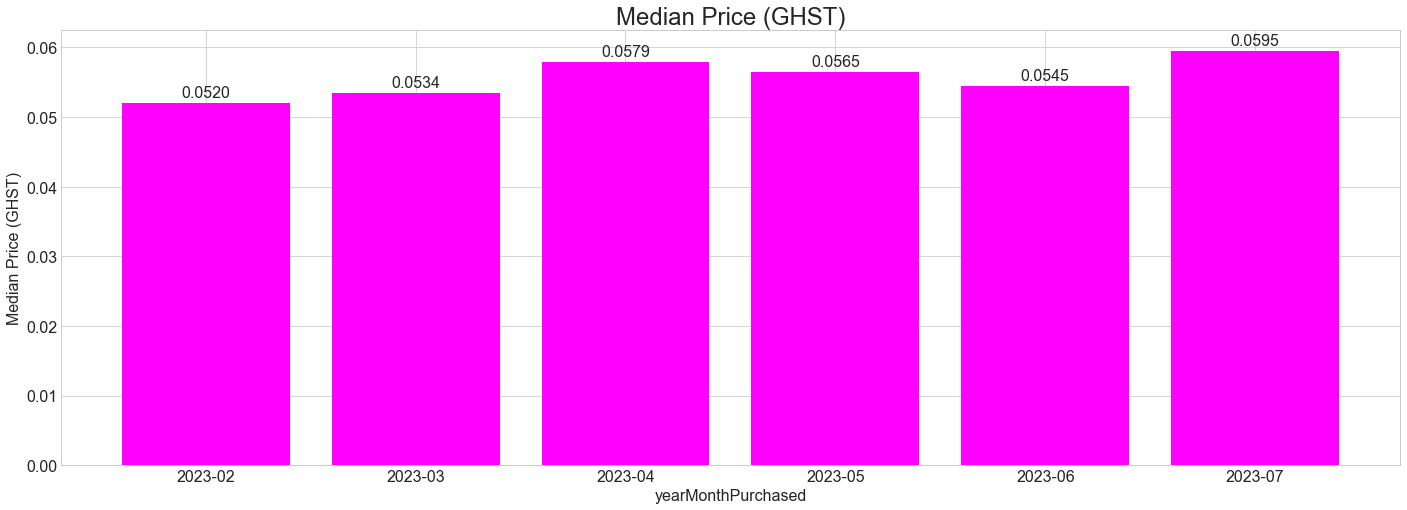

In [2]:
alloy_price_by_month = get_median_price_by_column('yearMonthPurchased', forge_purchases_types_df[forge_purchases_types_df['category_name'] == 'alloy']).reset_index()
fig, ax = get_bar_charts(alloy_price_by_month, 'yearMonthPurchased', ['Median Price (GHST)'], [GHST_COLOR], annotate_format='{:,.4f}')

### Core Prices

In [3]:
price_by_core_rarity = get_median_price_by_column('rarity', forge_purchases_types_df[forge_purchases_types_df['category_name'] == 'core'])
price_by_core_rarity.sort_values(by='Median Price (GHST)', ascending=True, inplace=True)
price_by_core_rarity.reset_index(inplace=True)
price_by_core_rarity.rename(columns={'rarity': 'Core Rarity'}, inplace=True)
show_itable(price_by_core_rarity, order=[1, 'asc'], column_formats={'Median Price (GHST)': '{:,.2f}'})

### Schematic Prices

In [4]:
price_by_schematic_rarity = get_median_price_by_column('rarity', forge_purchases_types_df[forge_purchases_types_df['category_name'] == 'schematic'])
price_by_schematic_rarity.sort_values(by='Median Price (GHST)', ascending=True, inplace=True)
price_by_schematic_rarity.reset_index(inplace=True)
price_by_schematic_rarity.rename(columns={'rarity': 'Schematic Rarity'}, inplace=True)
show_itable(price_by_schematic_rarity, order=[1, 'asc'], column_formats={'Median Price (GHST)': '{:,.2f}'})

### Geode Prices

In [5]:
price_by_geode_rarity = get_median_price_by_column('rarity', forge_purchases_types_df[forge_purchases_types_df['category_name'] == 'geode'])
price_by_geode_rarity.sort_values(by='Median Price (GHST)', ascending=True, inplace=True)
price_by_geode_rarity.reset_index(inplace=True)
price_by_geode_rarity.rename(columns={'rarity': 'Geode Rarity'}, inplace=True)
show_itable(price_by_geode_rarity, order=[1, 'asc'], column_formats={'Median Price (GHST)': '{:,.2f}'})

### Essence Price Over Time

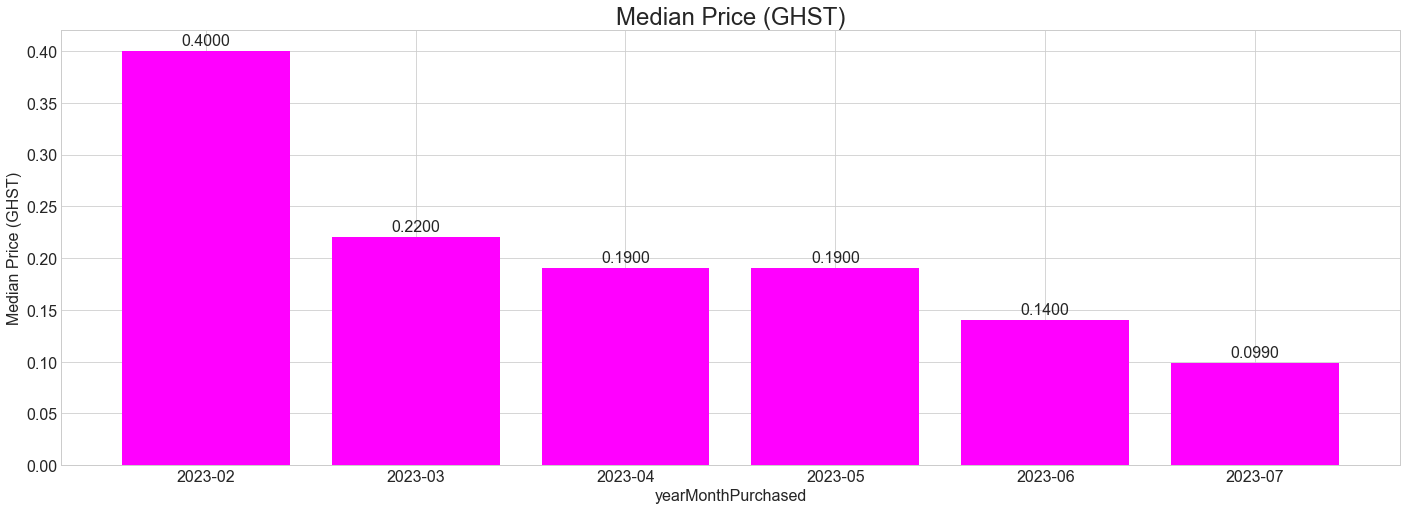

In [6]:
essence_price_by_month = get_median_price_by_column('yearMonthPurchased', forge_purchases_types_df[forge_purchases_types_df['category_name'] == 'essence']).reset_index()
fig, ax = get_bar_charts(essence_price_by_month, 'yearMonthPurchased', ['Median Price (GHST)'], [GHST_COLOR], annotate_format='{:,.4f}')
plt.show()